# Cleaning Process

## Clean Train

In [1]:
from src.utils import descompress_zip
import pandas as pd
import seaborn as sns
#import libraries

In [2]:
df_train = descompress_zip("input/diamonds-datamad0121.zip", "train.csv")
df_test = descompress_zip("input/diamonds-datamad0121.zip", "test.csv")
#unzip and rea csv

In [3]:
df_train.head()
#check data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


In [4]:
df_train.shape
#check the number of columns and rows

(40455, 11)

In [5]:
df_train.columns
#check the columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [6]:
df_train.dtypes
#check types

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [7]:
df_train.corr()
#first correlation

,id,carat,depth,table,x,y,z,price
id,1.000000,-0.006196,0.001098,-0.008829,-0.007112,-0.006420,-0.007766,-0.006926
carat,-0.006196,1.000000,0.025089,0.182590,0.974516,0.950563,0.947930,0.920878
depth,0.001098,0.025089,1.000000,-0.300152,-0.028389,-0.032561,0.091421,-0.000924
table,-0.008829,0.182590,-0.300152,1.000000,0.196031,0.184322,0.150142,0.158128
x,-0.007112,0.974516,-0.028389,0.196031,1.000000,0.973617,0.965597,0.957653
y,-0.006420,0.950563,-0.032561,0.184322,0.973617,1.000000,0.945958,0.934700
z,-0.007766,0.947930,0.091421,0.150142,0.965597,0.945958,1.000000,0.930157
price,-0.006926,0.920878,-0.000924,0.158128,0.957653,0.934700,0.930157,1.000000


In [8]:
df_train = df_train.drop(["id", "depth", "y", "z"], axis=1)
#drop columns: id -> Useless
#              depth -> Low correlation with response variable
#              y, z -> high correlation with another variables

In [9]:
df_train
#check data

,carat,cut,color,clarity,table,x,price
0,1.50,Premium,F,VS2,58.0,7.32,9.588
1,2.01,Very Good,E,SI2,59.0,8.11,9.748
2,0.50,Ideal,E,SI1,57.0,5.13,7.255
3,0.25,Very Good,F,VVS2,57.0,4.05,6.450
4,0.52,Ideal,G,VS2,55.0,5.16,7.721
...,...,...,...,...,...,...,...
40450,1.04,Very Good,I,SI2,57.0,6.60,8.190
40451,0.51,Very Good,E,SI1,59.0,5.09,7.246
40452,1.51,Ideal,H,VS2,57.0,7.37,9.277
40453,2.02,Premium,H,VS2,60.0,8.16,9.680


In [10]:
df_train.clarity.unique()
#check uniques

array(['VS2', 'SI2', 'SI1', 'VVS2', 'VS1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [11]:
df_train.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [12]:
df_train.color.unique()

array(['F', 'E', 'G', 'D', 'J', 'I', 'H'], dtype=object)

In [13]:
encoding_cut =  {"Fair":1, "Good":2, 
          "Ideal":3, "Very Good":4, "Premium":5}
    
    
encoding_color = {'E':1,'D':2,'F':3,
             'G':4,'H':5,'I':6,
             'J':7}

encoding_clarity = {'I1':1,'SI2':2,
               'SI1':3,'VS2':4,'VS1':5,
               'VVS2':6,'VVS1':7,'IF':8}
#review diamond documentation and see that there 
#is numerical order in the categorical variables. encode the categorical variables by numerical variables.

In [14]:
df_train["cut"] = df_train["cut"].apply(lambda x: encoding_cut[x])
df_train["color"] = df_train["color"].apply(lambda x: encoding_color[x])
df_train["clarity"] = df_train["clarity"].apply(lambda x: encoding_clarity[x])
#replace categorical variables with numerical variables

In [15]:
df_train.corr()
#second correlation

,carat,cut,color,clarity,table,x,price
carat,1.000000,0.062156,0.289227,-0.350899,0.182590,0.974516,0.920878
cut,0.062156,1.000000,0.020787,-0.041586,0.242985,0.073185,0.059406
color,0.289227,0.020787,1.000000,0.016655,0.024083,0.269491,0.159381
clarity,-0.350899,-0.041586,0.016655,1.000000,-0.162142,-0.370347,-0.212762
table,0.182590,0.242985,0.024083,-0.162142,1.000000,0.196031,0.158128
x,0.974516,0.073185,0.269491,-0.370347,0.196031,1.000000,0.957653
price,0.920878,0.059406,0.159381,-0.212762,0.158128,0.957653,1.000000


<AxesSubplot:>

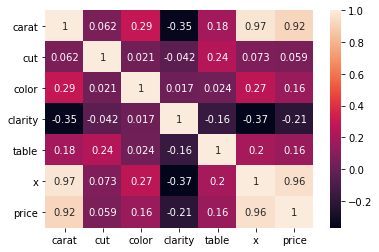

In [16]:
sns.heatmap(df_train.corr(), annot=True)
#check heatmap

In [17]:
df_train.to_csv('train.csv', header=True, index=False)
#convert to .csv

## Clean Test

In [18]:
df_test
#same process

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.51,Very Good,E,SI2,58.3,61.9,5.19,5.20,3.04
1,1,1.02,Very Good,F,SI2,63.0,58.0,6.37,6.43,4.03
2,2,0.59,Ideal,D,VS2,61.9,56.0,5.39,5.34,3.32
3,3,0.90,Very Good,D,VS2,62.3,56.0,6.14,6.18,3.84
4,4,2.01,Premium,J,VS1,60.2,61.0,8.23,8.16,4.93
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.05,Premium,H,SI1,61.9,58.0,6.50,6.45,4.01
13481,13481,0.32,Ideal,F,VS2,62.1,57.0,4.35,4.38,2.71
13482,13482,0.41,Premium,J,VS1,61.3,59.0,4.78,4.74,2.92
13483,13483,0.30,Premium,G,VVS2,62.2,59.0,4.31,4.28,2.67


In [19]:
df_test.shape

(13485, 10)

In [20]:
df_test.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [21]:
df_test.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [22]:
df_test = df_test.drop(["id", "depth", "y", "z"], axis=1)

In [24]:
df_test["cut"] = df_test["cut"].apply(lambda x: encoding_cut[x])
df_test["color"] = df_test["color"].apply(lambda x: encoding_color[x])
df_test["clarity"] = df_test["clarity"].apply(lambda x: encoding_clarity[x])

In [25]:
df_test.to_csv('test.csv', header=True, index=False)